# 1. Import

In [260]:
# 1.1 Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1.2 Import dataset
raw_data = pd.read_csv("https://archive.ics.uci.edu/static/public/186/data.csv")

# 1.3 Print the shape of data
print(raw_data.shape)
# 1.4 Print the first few lines of data
print(raw_data.head())


(6497, 13)
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5

# 2. Data Cleaning 

In [261]:
# 2.1 Create copy for d
data = raw_data.copy()

# 2.2 Check if there is any missing d
print("Number of missing values in data:\n", data.isnull().sum())
print("There is no missing values in data.")

# 2.3 Check if there is any duplicate data
print("Number of data records with duplicated ids: ",data.index.duplicated().sum())
print("Number of duplicated data records: ", data.duplicated().sum())
print("Duplicate Data: \n", data[data.duplicated()].sort_values(by='fixed_acidity'))


Number of missing values in data:
 fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64
There is no missing values in data.
Number of data records with duplicated ids:  0
Number of duplicated data records:  1177
Duplicate Data: 
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
6271            4.9             0.335         0.14             1.3      0.036   
5549            4.9             0.345         0.34             1.0      0.068   
2803            5.0             0.330         0.16             1.5      0.049   
2812            5.0             0.330         0.16             1.5      0.049   
6044            5.0             0.350         0.25             7.8 

By investigation, there is no missing values in data and 1177 duplicated data rows.

We observed that not all duplicate data are the same and the duplicated data are reasonable.

Therefore, we decided to keep the data unchanged

# 3. Exploratory Data Analysis
We would analysis the red and white wine data seperately and compare their difference first

After that, we would combine both datasets and perform analysis


In [262]:
# 3.1 Encode color of wine as binary variables: {"red": 0, "white": 1}
data['color'] = data['color'].map({"red": 0, "white": 1})

# 3.2 Seperate red and white wine data
red_wine_data = data[data['color']==0].copy()
white_wine_data = data[data['color']==1].copy()

# 3.3 Check the number of records for both red and white wine
print("The number of red wine data records is ", len(red_wine_data))
print("The number of white wine data records is ", len(white_wine_data))

The number of red wine data records is  1599
The number of white wine data records is  4898


In [263]:
# 3.4 Show the Summary Statistics
red_wine_summary = red_wine_data.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].drop(['color'], axis=1).style.set_caption('Summary Statistics for Red Wine Data').format(precision=2).background_gradient(cmap='Blues')
display(red_wine_summary)
white_wine_summary = white_wine_data.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].drop(['color'], axis=1).style.set_caption('Summary Statistics for White Wine Data').format(precision=2).background_gradient(cmap='Blues')
display(white_wine_summary)
wine_summary = data.describe().loc[['mean', 'std', 'min', '25%', '50%', '75%', 'max']].drop(['color'], axis=1).style.set_caption('Summary Statistics for Wine Data').format(precision=2).background_gradient(cmap='Blues')
display(wine_summary)

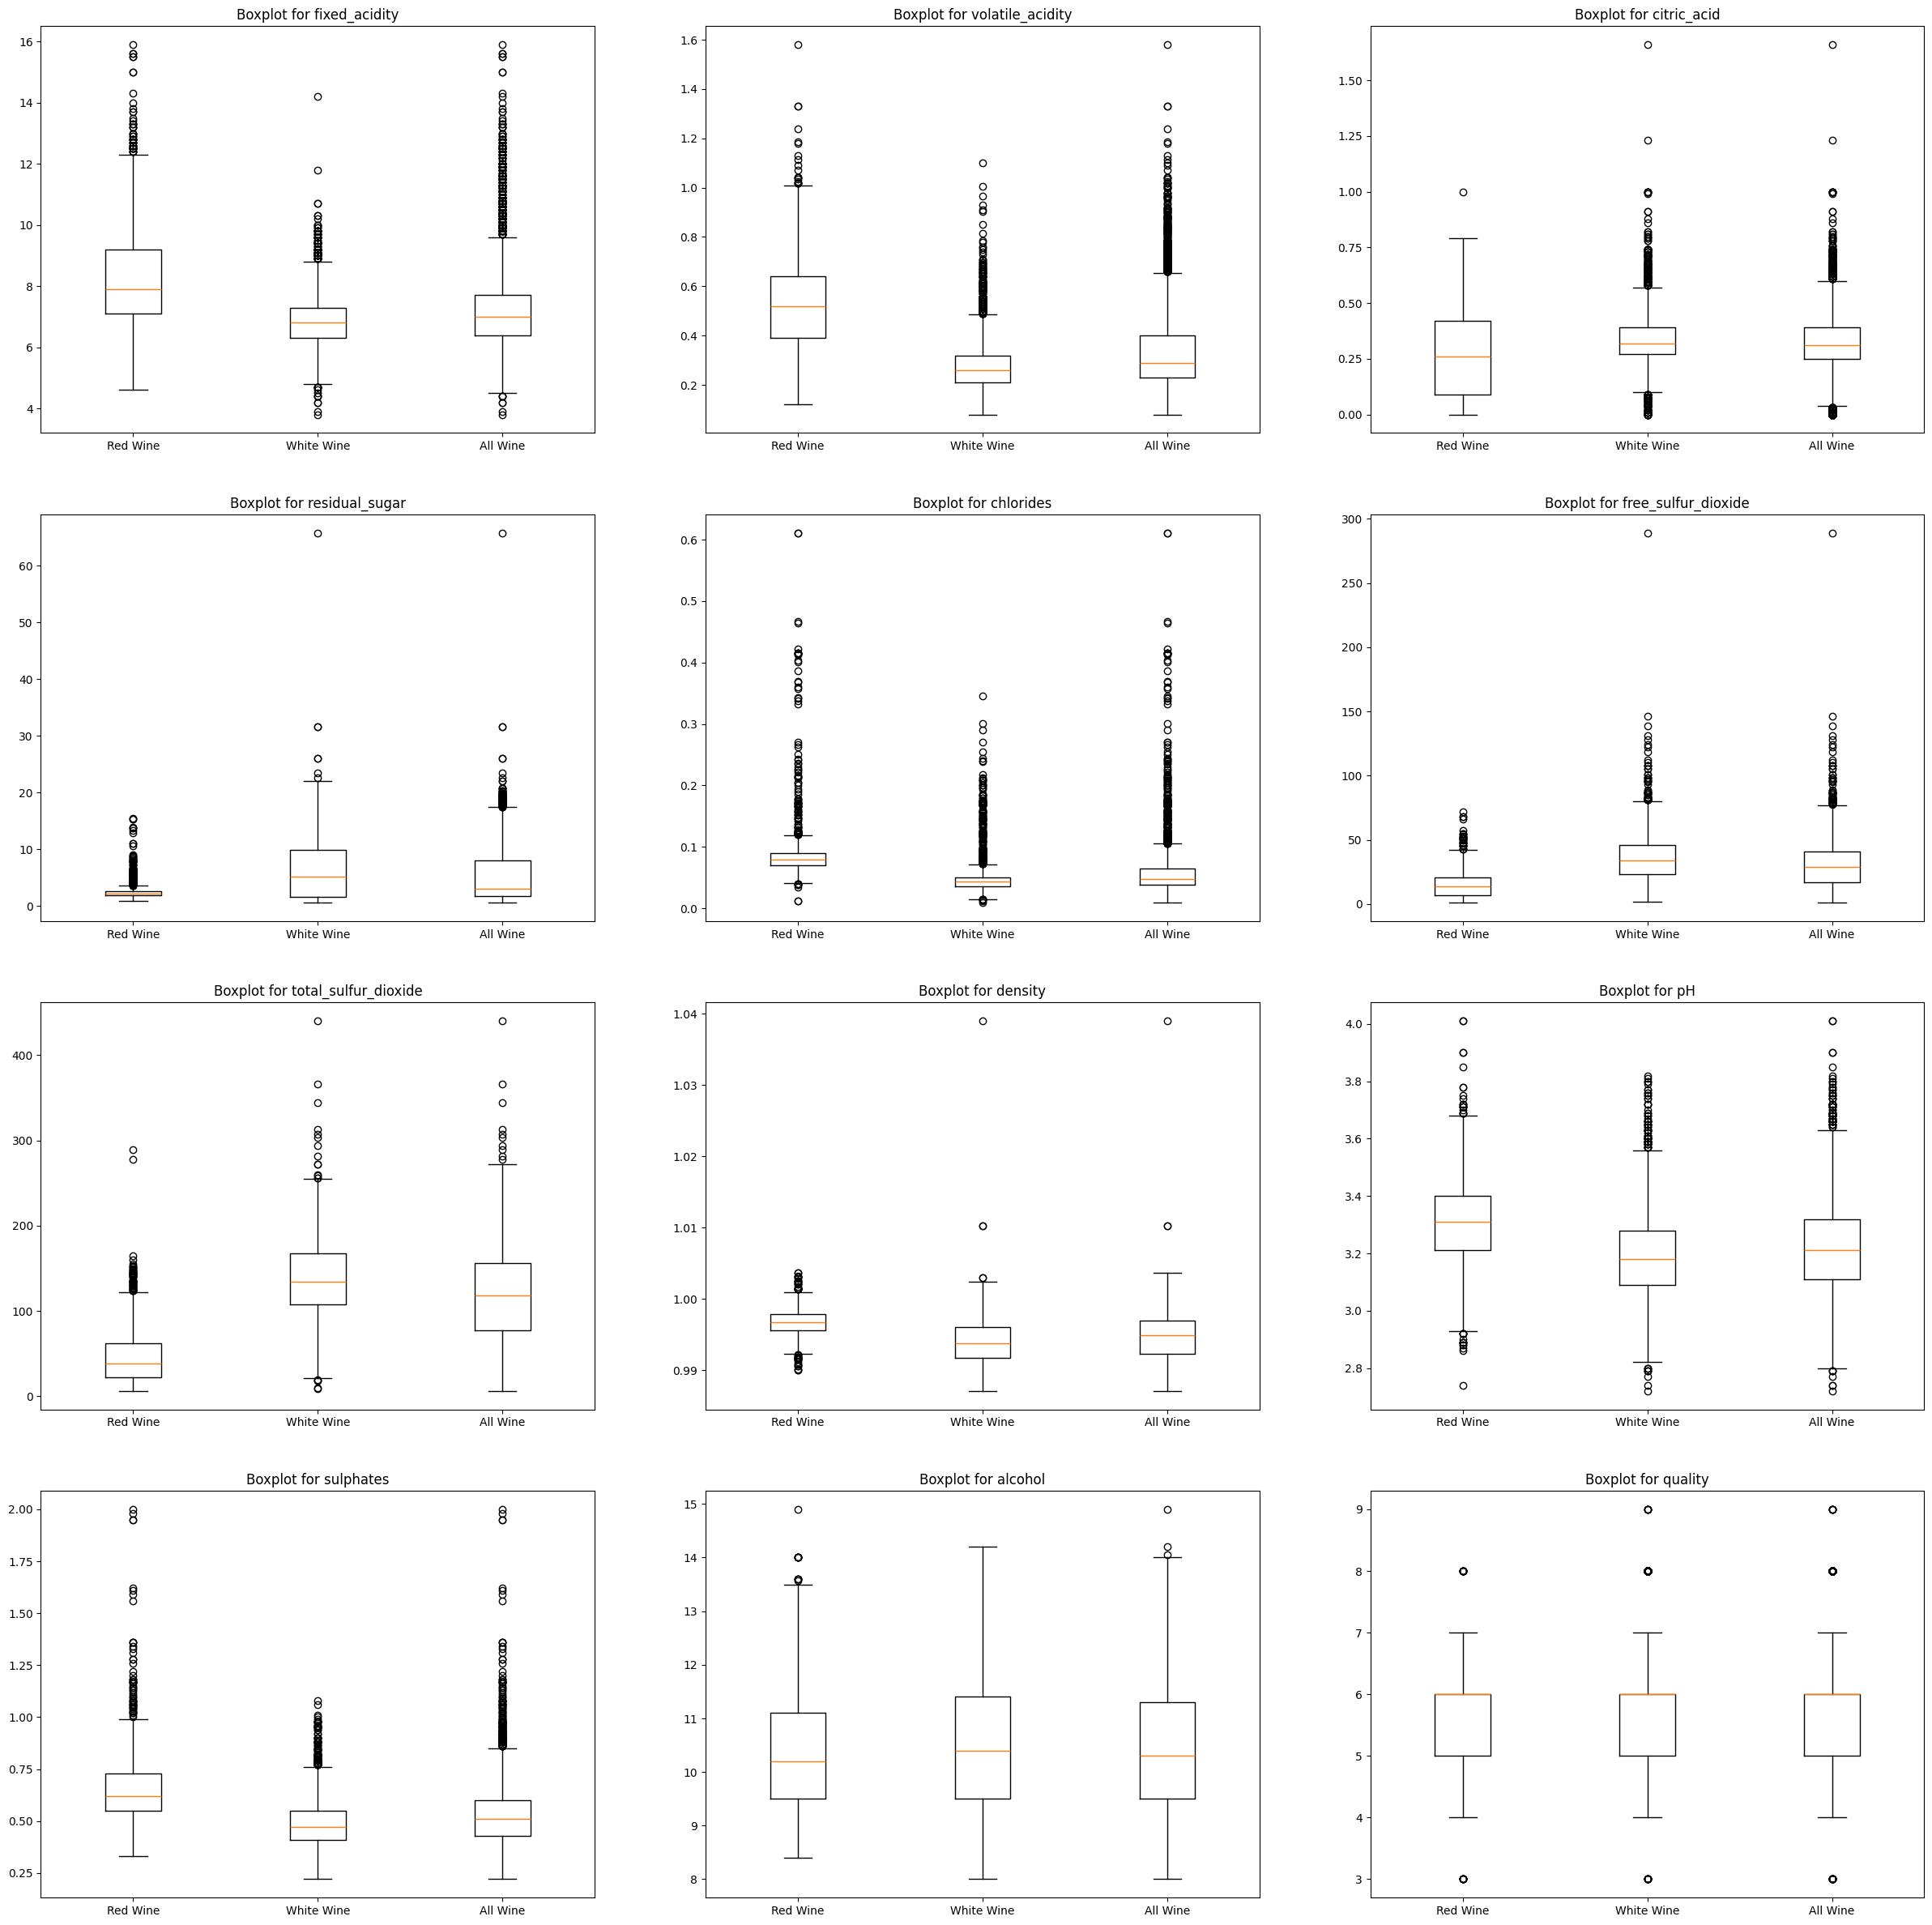

In [264]:
# 3.4 Use box plot to check if there is any outliers in features
fig, axes = plt.subplots(4, 3, figsize=(30, 30))

for idx, feature in enumerate(data.columns[:len(data.columns)-1]):
    row = idx // 3
    col = idx % 3
    axes[row, col].boxplot([red_wine_data[feature], white_wine_data[feature], data[feature]])
    axes[row, col].set_xticklabels(["Red Wine", "White Wine", "All Wine"])
    axes[row, col].set_title("Boxplot for "+feature)

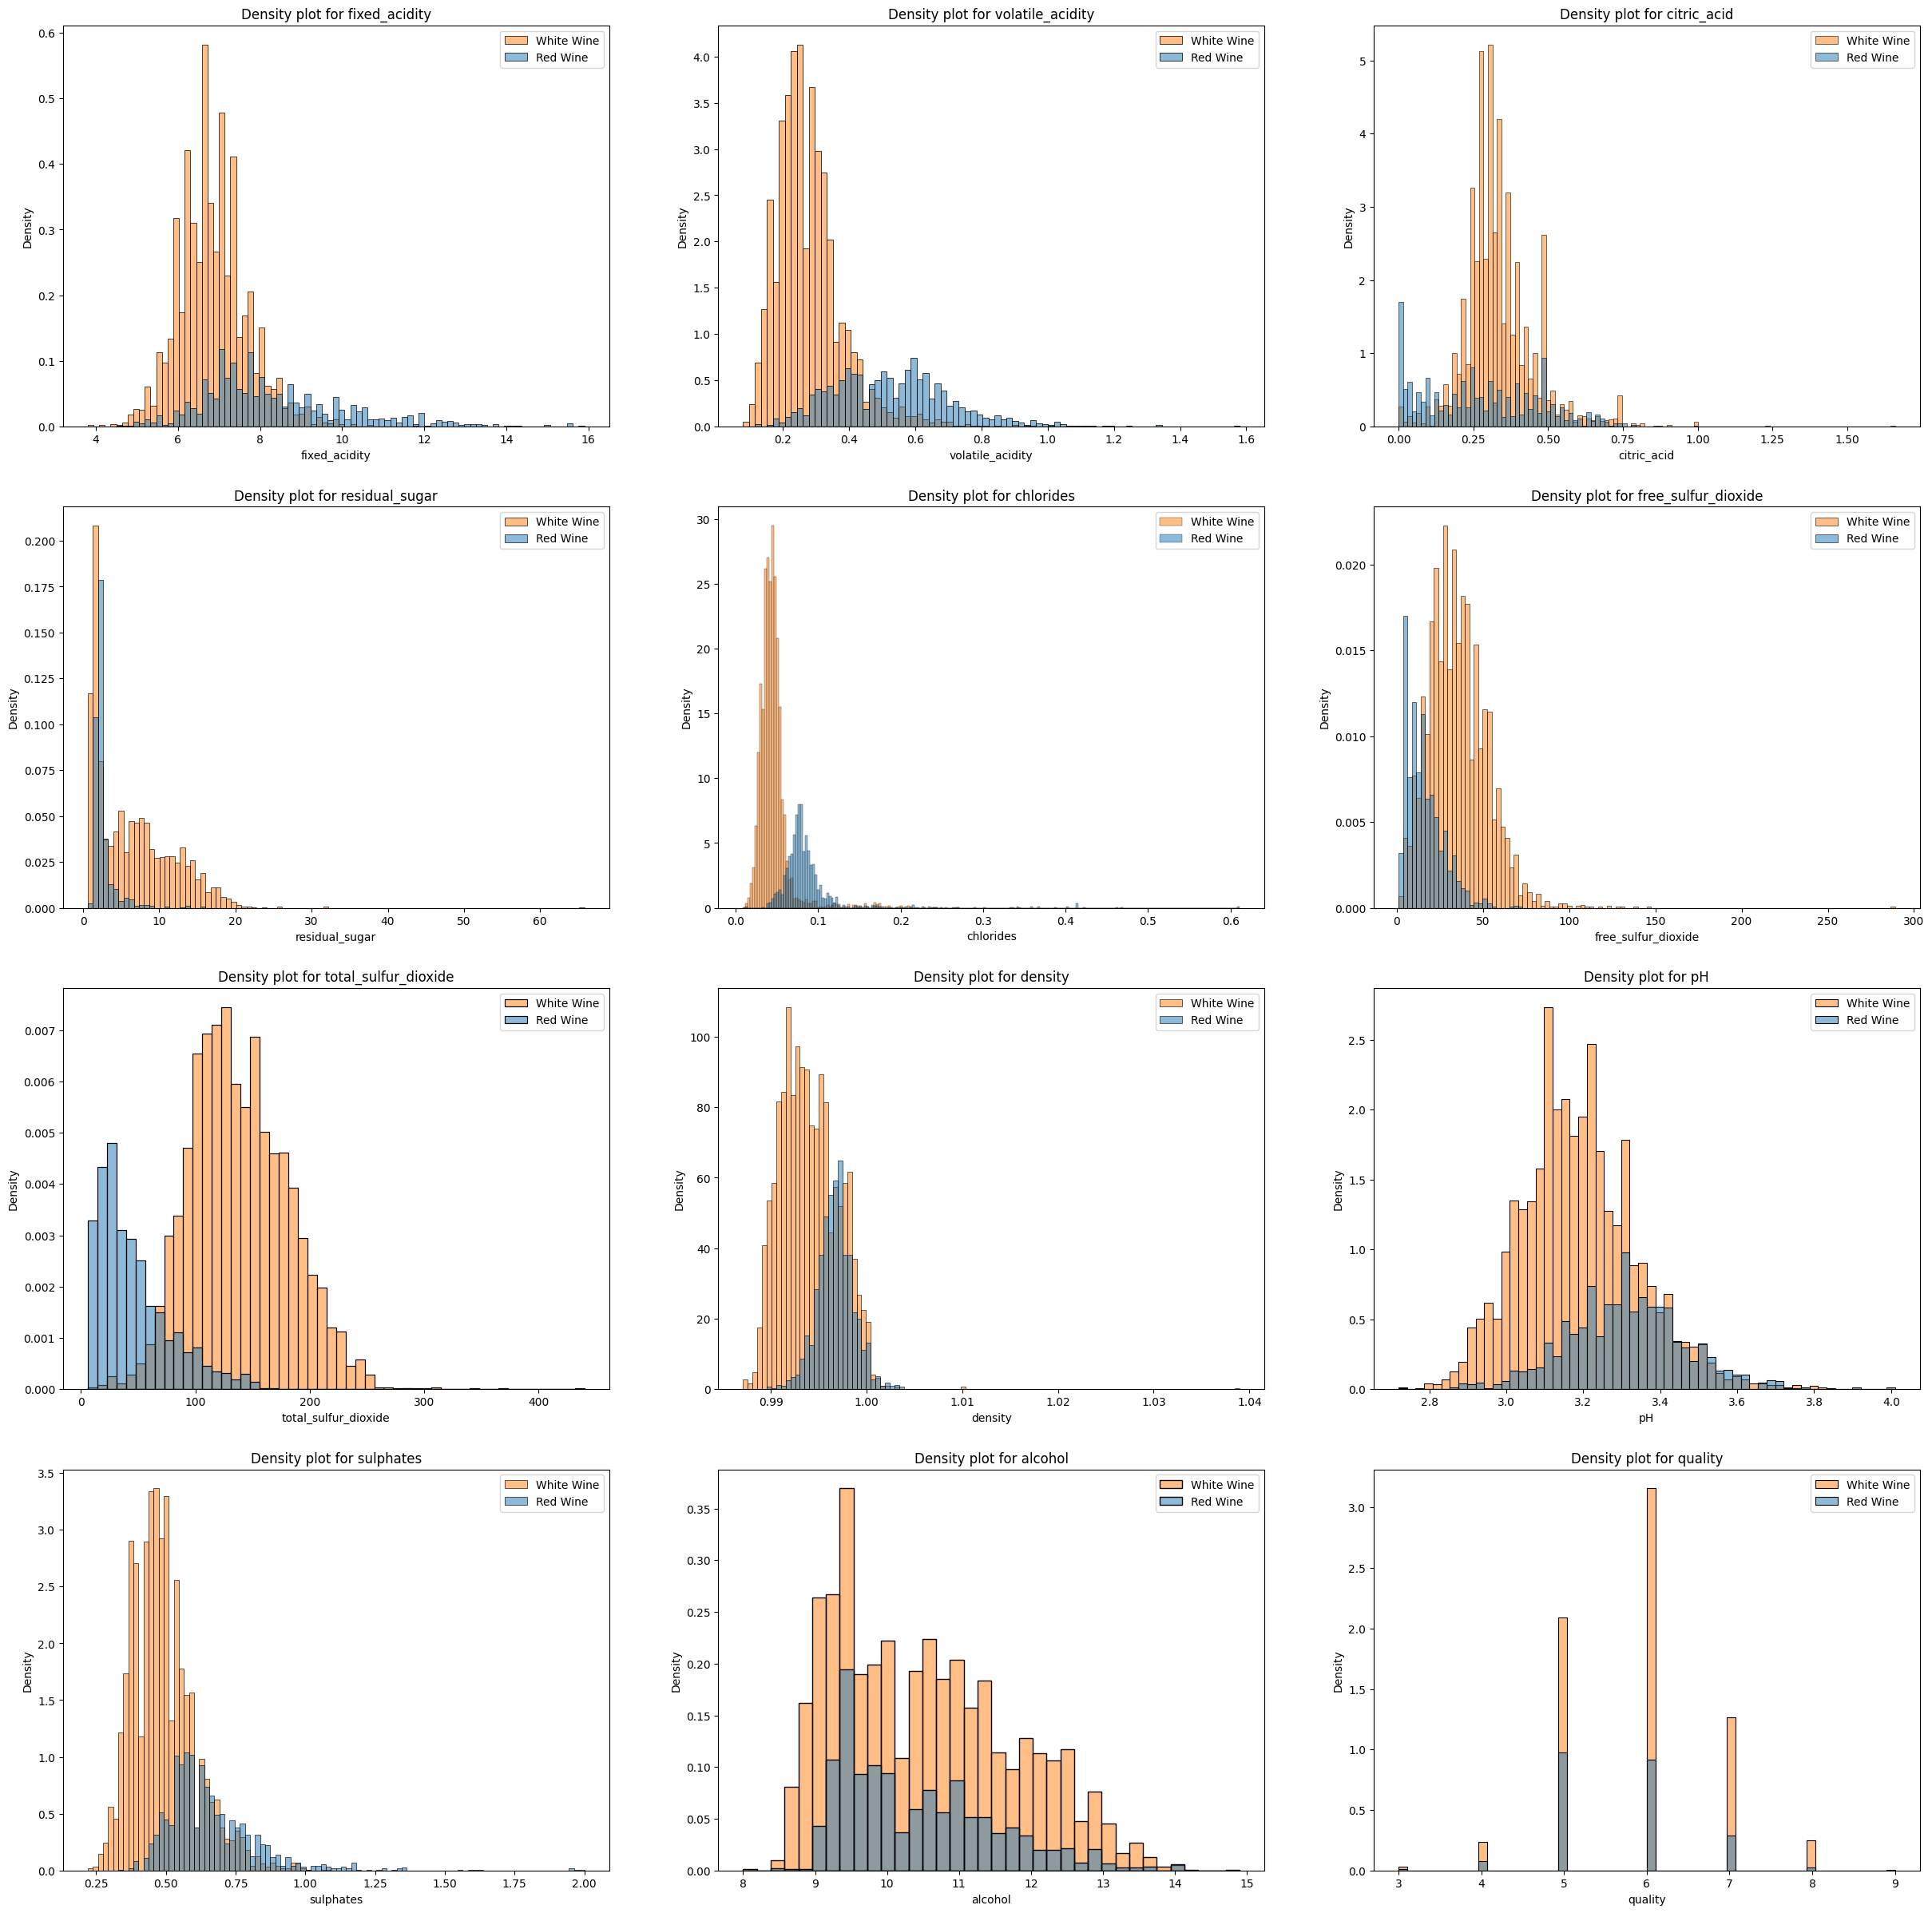

In [265]:
# 3.5 Histplot
fig, axes = plt.subplots(4, 3, figsize=(30, 30))

for idx, feature in enumerate(data.columns[:len(data.columns)-1]):
    row = idx // 3
    col = idx % 3
    sns.histplot(ax=axes[row, col], data=data, x=feature, hue="color", stat="density")
    axes[row, col].set_title("Density plot for "+feature)
    axes[row, col].legend(labels=['White Wine', 'Red Wine'])

In [266]:
# 3.6 Remove Outliers
num_data_removed = len(data[((data['density'] > 1.03) | 
              (data['volatile_acidity'] > 1.4) | 
              (data['citric_acid'] > 1.1) | 
              (data['residual_sugar'] > 40) | 
              (data['chlorides'] > 0.5) | 
              (data['free_sulfur_dioxide'] > 200) | 
              (data['total_sulfur_dioxide'] > 320) | 
              (data['density'] > 1.01) | 
              (data['sulphates']>1.75))])

data = data[~((data['density'] > 1.03) | 
              (data['volatile_acidity'] > 1.4) | 
              (data['citric_acid'] > 1.1) | 
              (data['residual_sugar'] > 40) | 
              (data['chlorides'] > 0.5) | 
              (data['free_sulfur_dioxide'] > 200) | 
              (data['total_sulfur_dioxide'] > 320) | 
              (data['density'] > 1.01) | 
              (data['sulphates']>1.75))]

red_wine_data = data[data['color']==0].copy()
white_wine_data = data[data['color']==1].copy()

print("The number of records removed = ", num_data_removed)

The number of records removed =  14


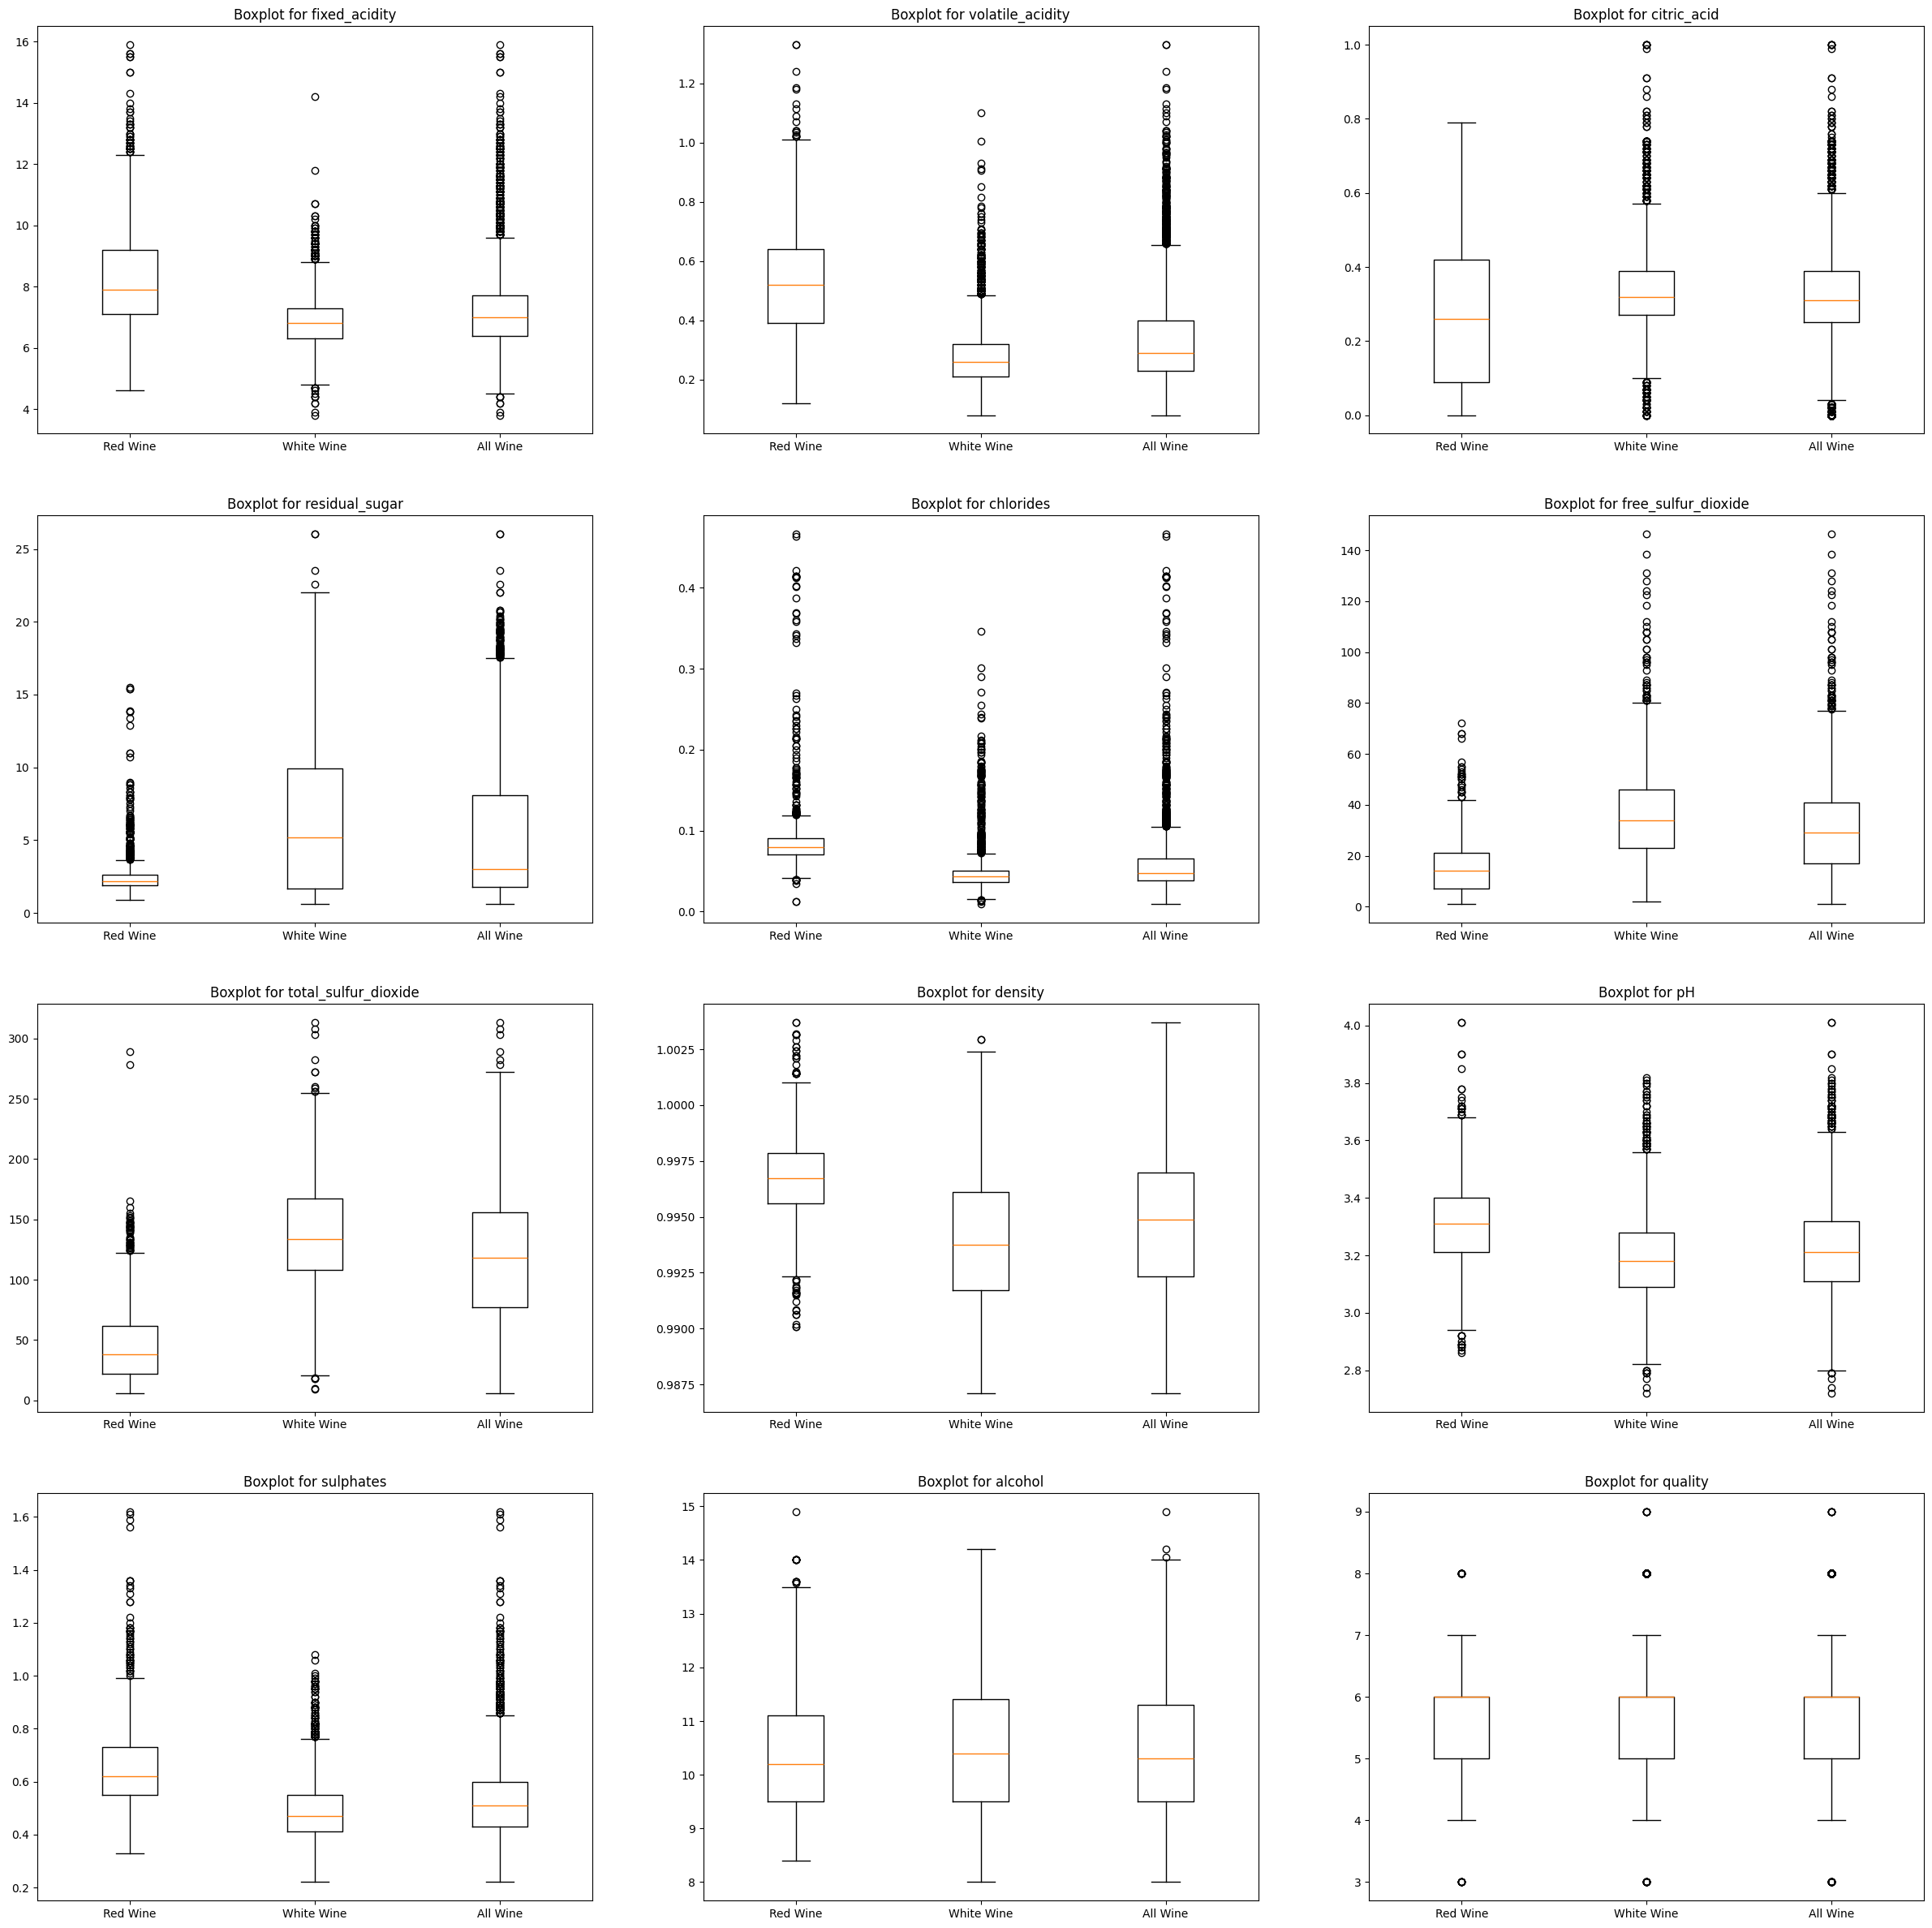

In [267]:
# 3.7 Use boxplot to check again
fig, axes = plt.subplots(4, 3, figsize=(30, 30))

for idx, feature in enumerate(data.columns[:len(data.columns)-1]):
    row = idx // 3
    col = idx % 3
    axes[row, col].boxplot([red_wine_data[feature], white_wine_data[feature], data[feature]])
    axes[row, col].set_xticklabels(["Red Wine", "White Wine", "All Wine"])
    axes[row, col].set_title("Boxplot for "+feature)

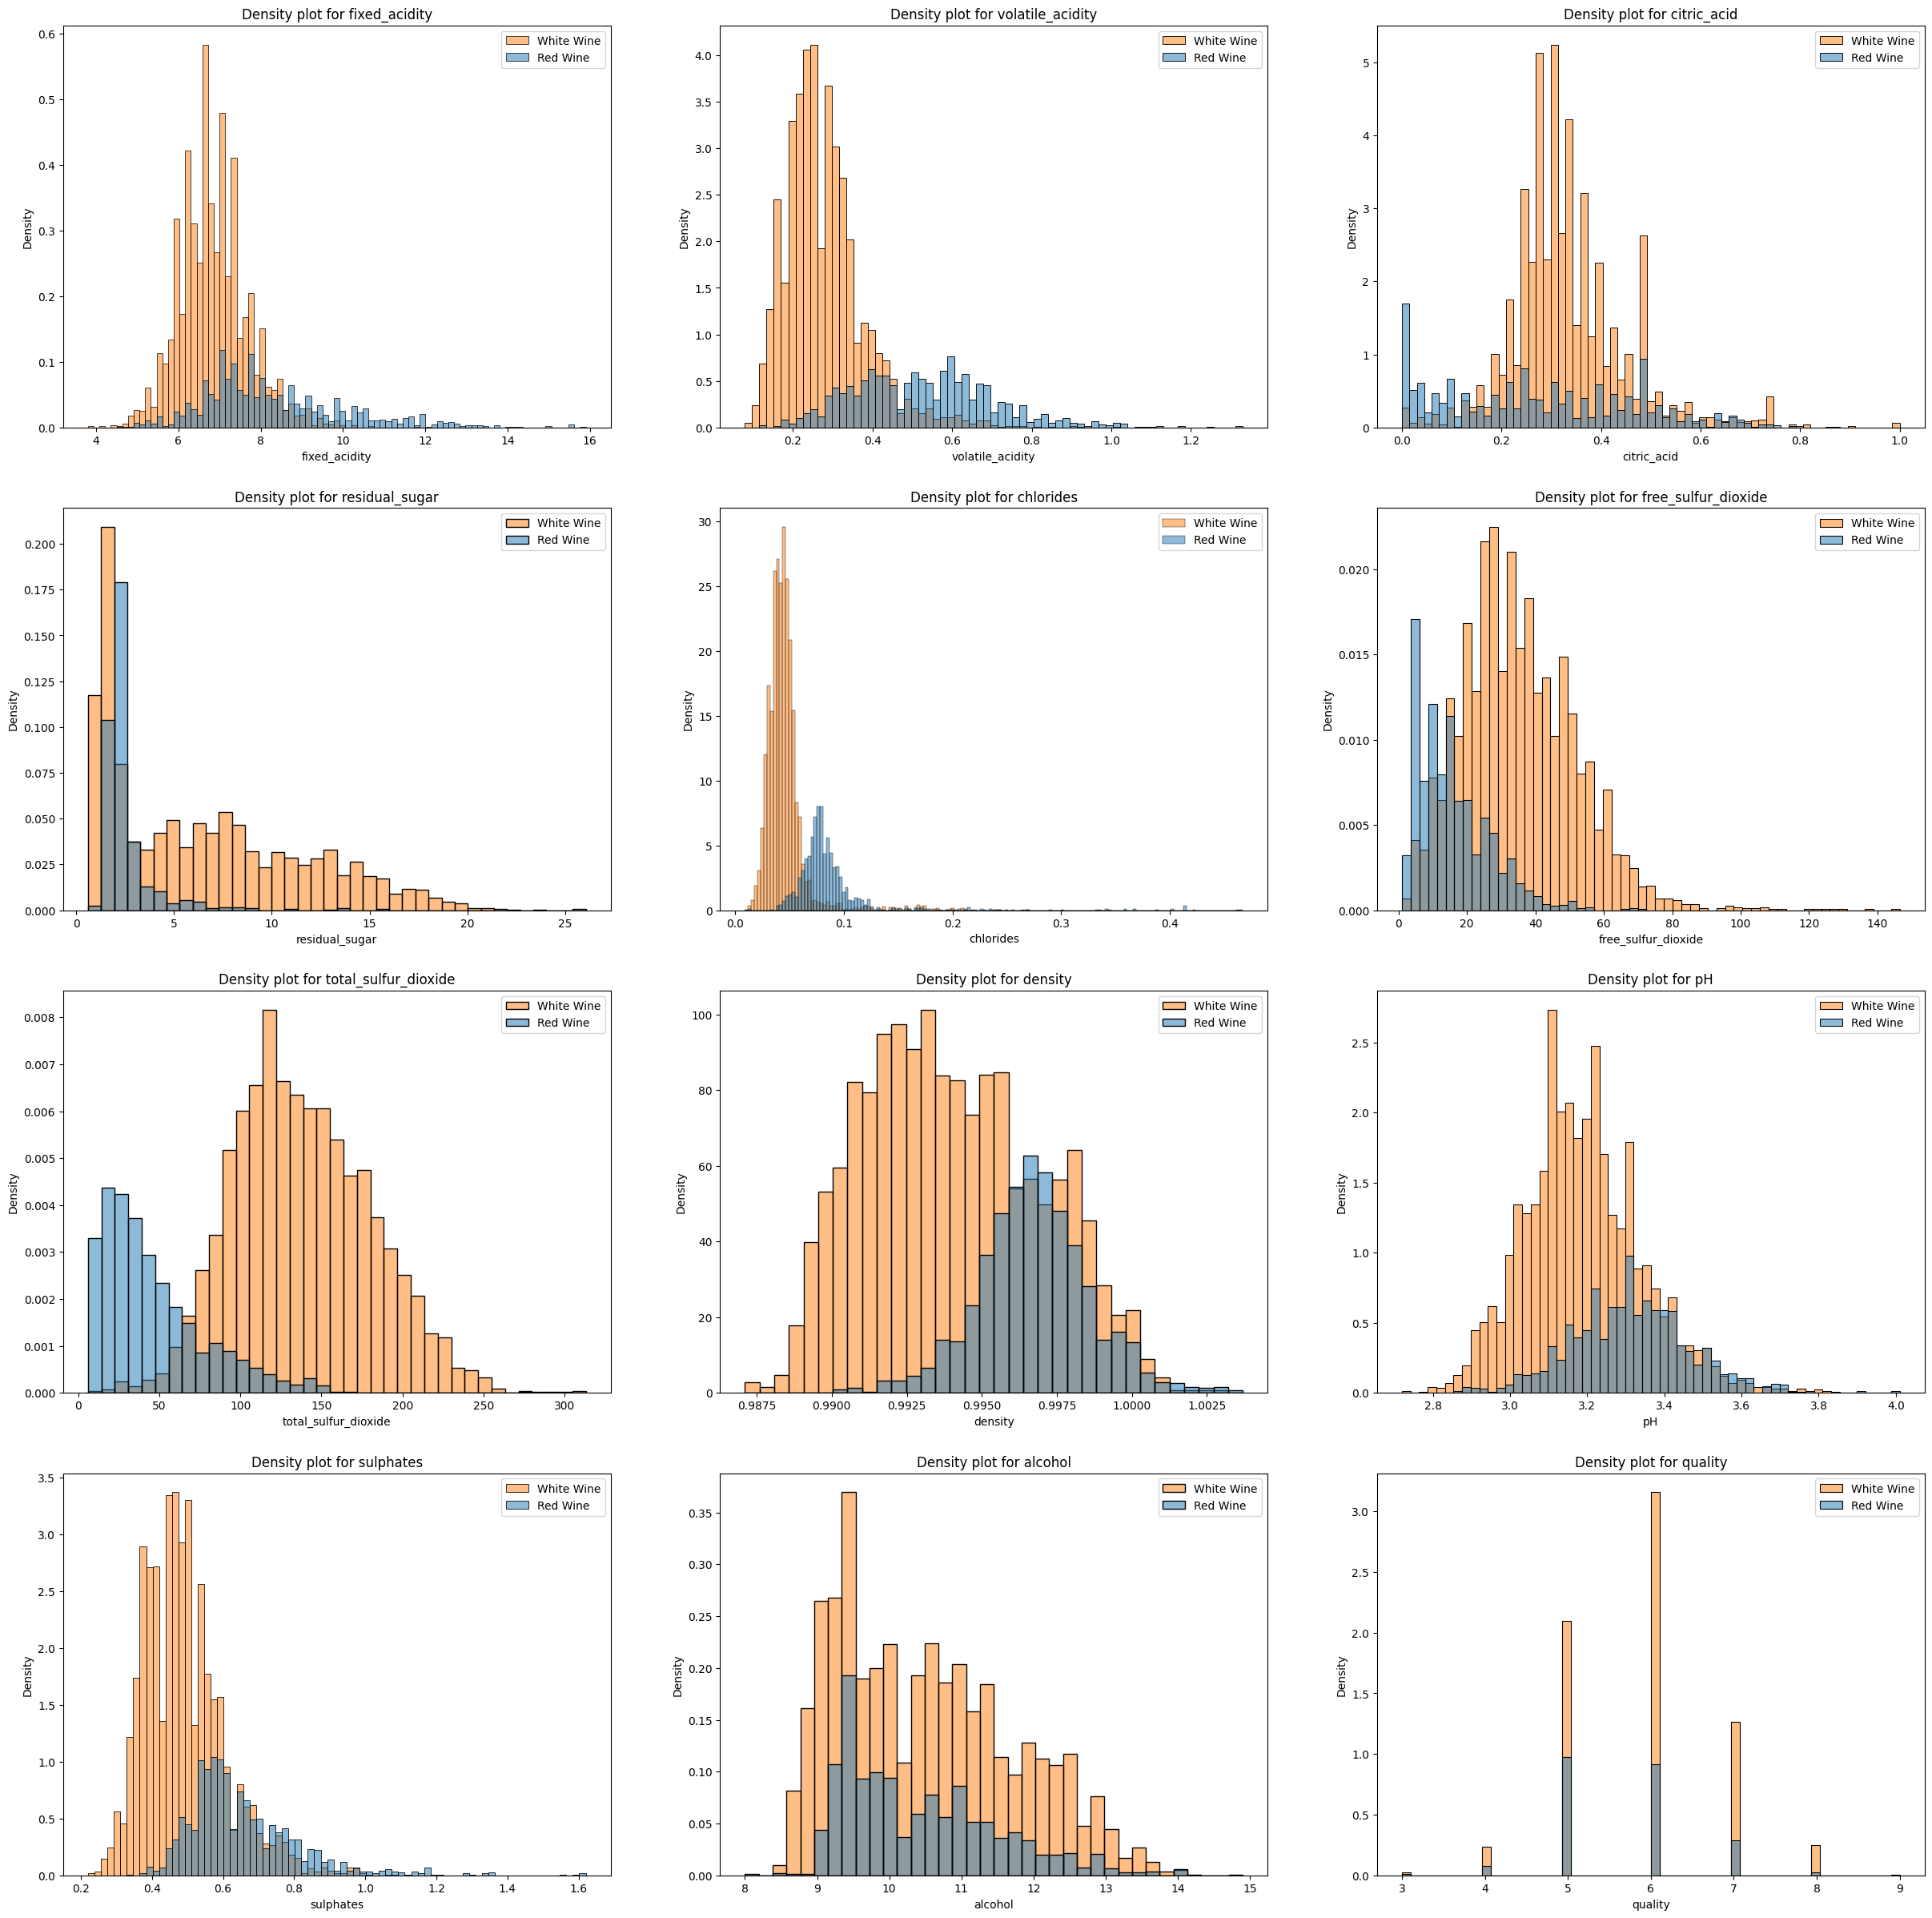

In [268]:
# 3.8 Use Histplot to check again
fig, axes = plt.subplots(4, 3, figsize=(30, 30))

for idx, feature in enumerate(data.columns[:len(data.columns)-1]):
    row = idx // 3
    col = idx % 3
    sns.histplot(ax=axes[row, col], data=data, x=feature, hue="color", stat="density")
    axes[row, col].set_title("Density plot for "+feature)
    axes[row, col].legend(labels=['White Wine', 'Red Wine'])

To conclude, 14 records have been excluded from the dataset as part of our outlier removal process.

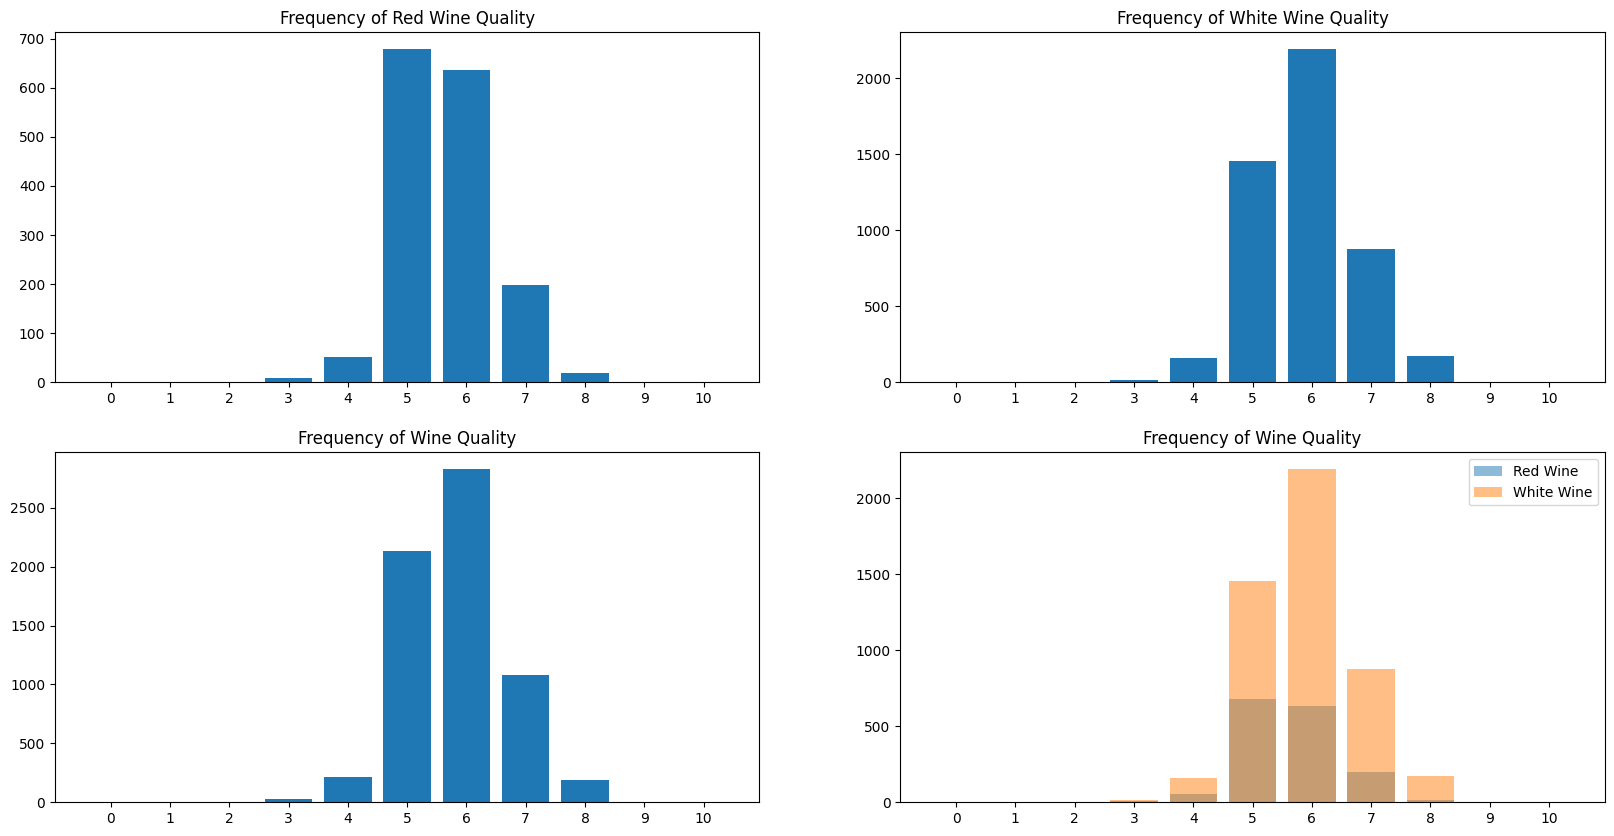

In [226]:
# 3.9 Use Histogram to check the frequency of wine quality
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
# bins = np.arange(min(data['quality']), max(data['quality']) + 2) - 0.5
bins = np.arange(0, 10 + 2) - 0.5

# Red Wine
axes[0, 0].hist(red_wine_data['quality'], bins=bins, align='mid', rwidth=0.8)
axes[0, 0].set_title('Frequency of Red Wine Quality')

# White Wine
axes[0, 1].hist(white_wine_data['quality'], bins=bins, align='mid', rwidth=0.8)
axes[0, 1].set_title('Frequency of White Wine Quality')

# All Wine (Sum)
axes[1, 0].hist(data['quality'], bins=bins, align='mid', rwidth=0.8)
axes[1, 0].set_title('Frequency of Wine Quality')

# Red Wine and White Wine on the same graph
axes[1, 1].hist(red_wine_data['quality'], bins=bins, align='mid', rwidth=0.8, alpha=0.5, label='Red Wine')
axes[1, 1].hist(white_wine_data['quality'], bins=bins, align='mid', rwidth=0.8, alpha=0.5, label='White Wine')
axes[1, 1].set_title('Frequency of Wine Quality')
axes[1, 1].legend(loc='upper right')

ticks = range(11)
plt.setp(axes, xticks=ticks)
plt.show()

By observation, the quality of wine range from 3 to 8 and mostly within 5 and 7. Also, the quality of white wine is generally higher than that of red wine. Therefore, we can conclude that the data is imbalanced and concentrated at 5-7.

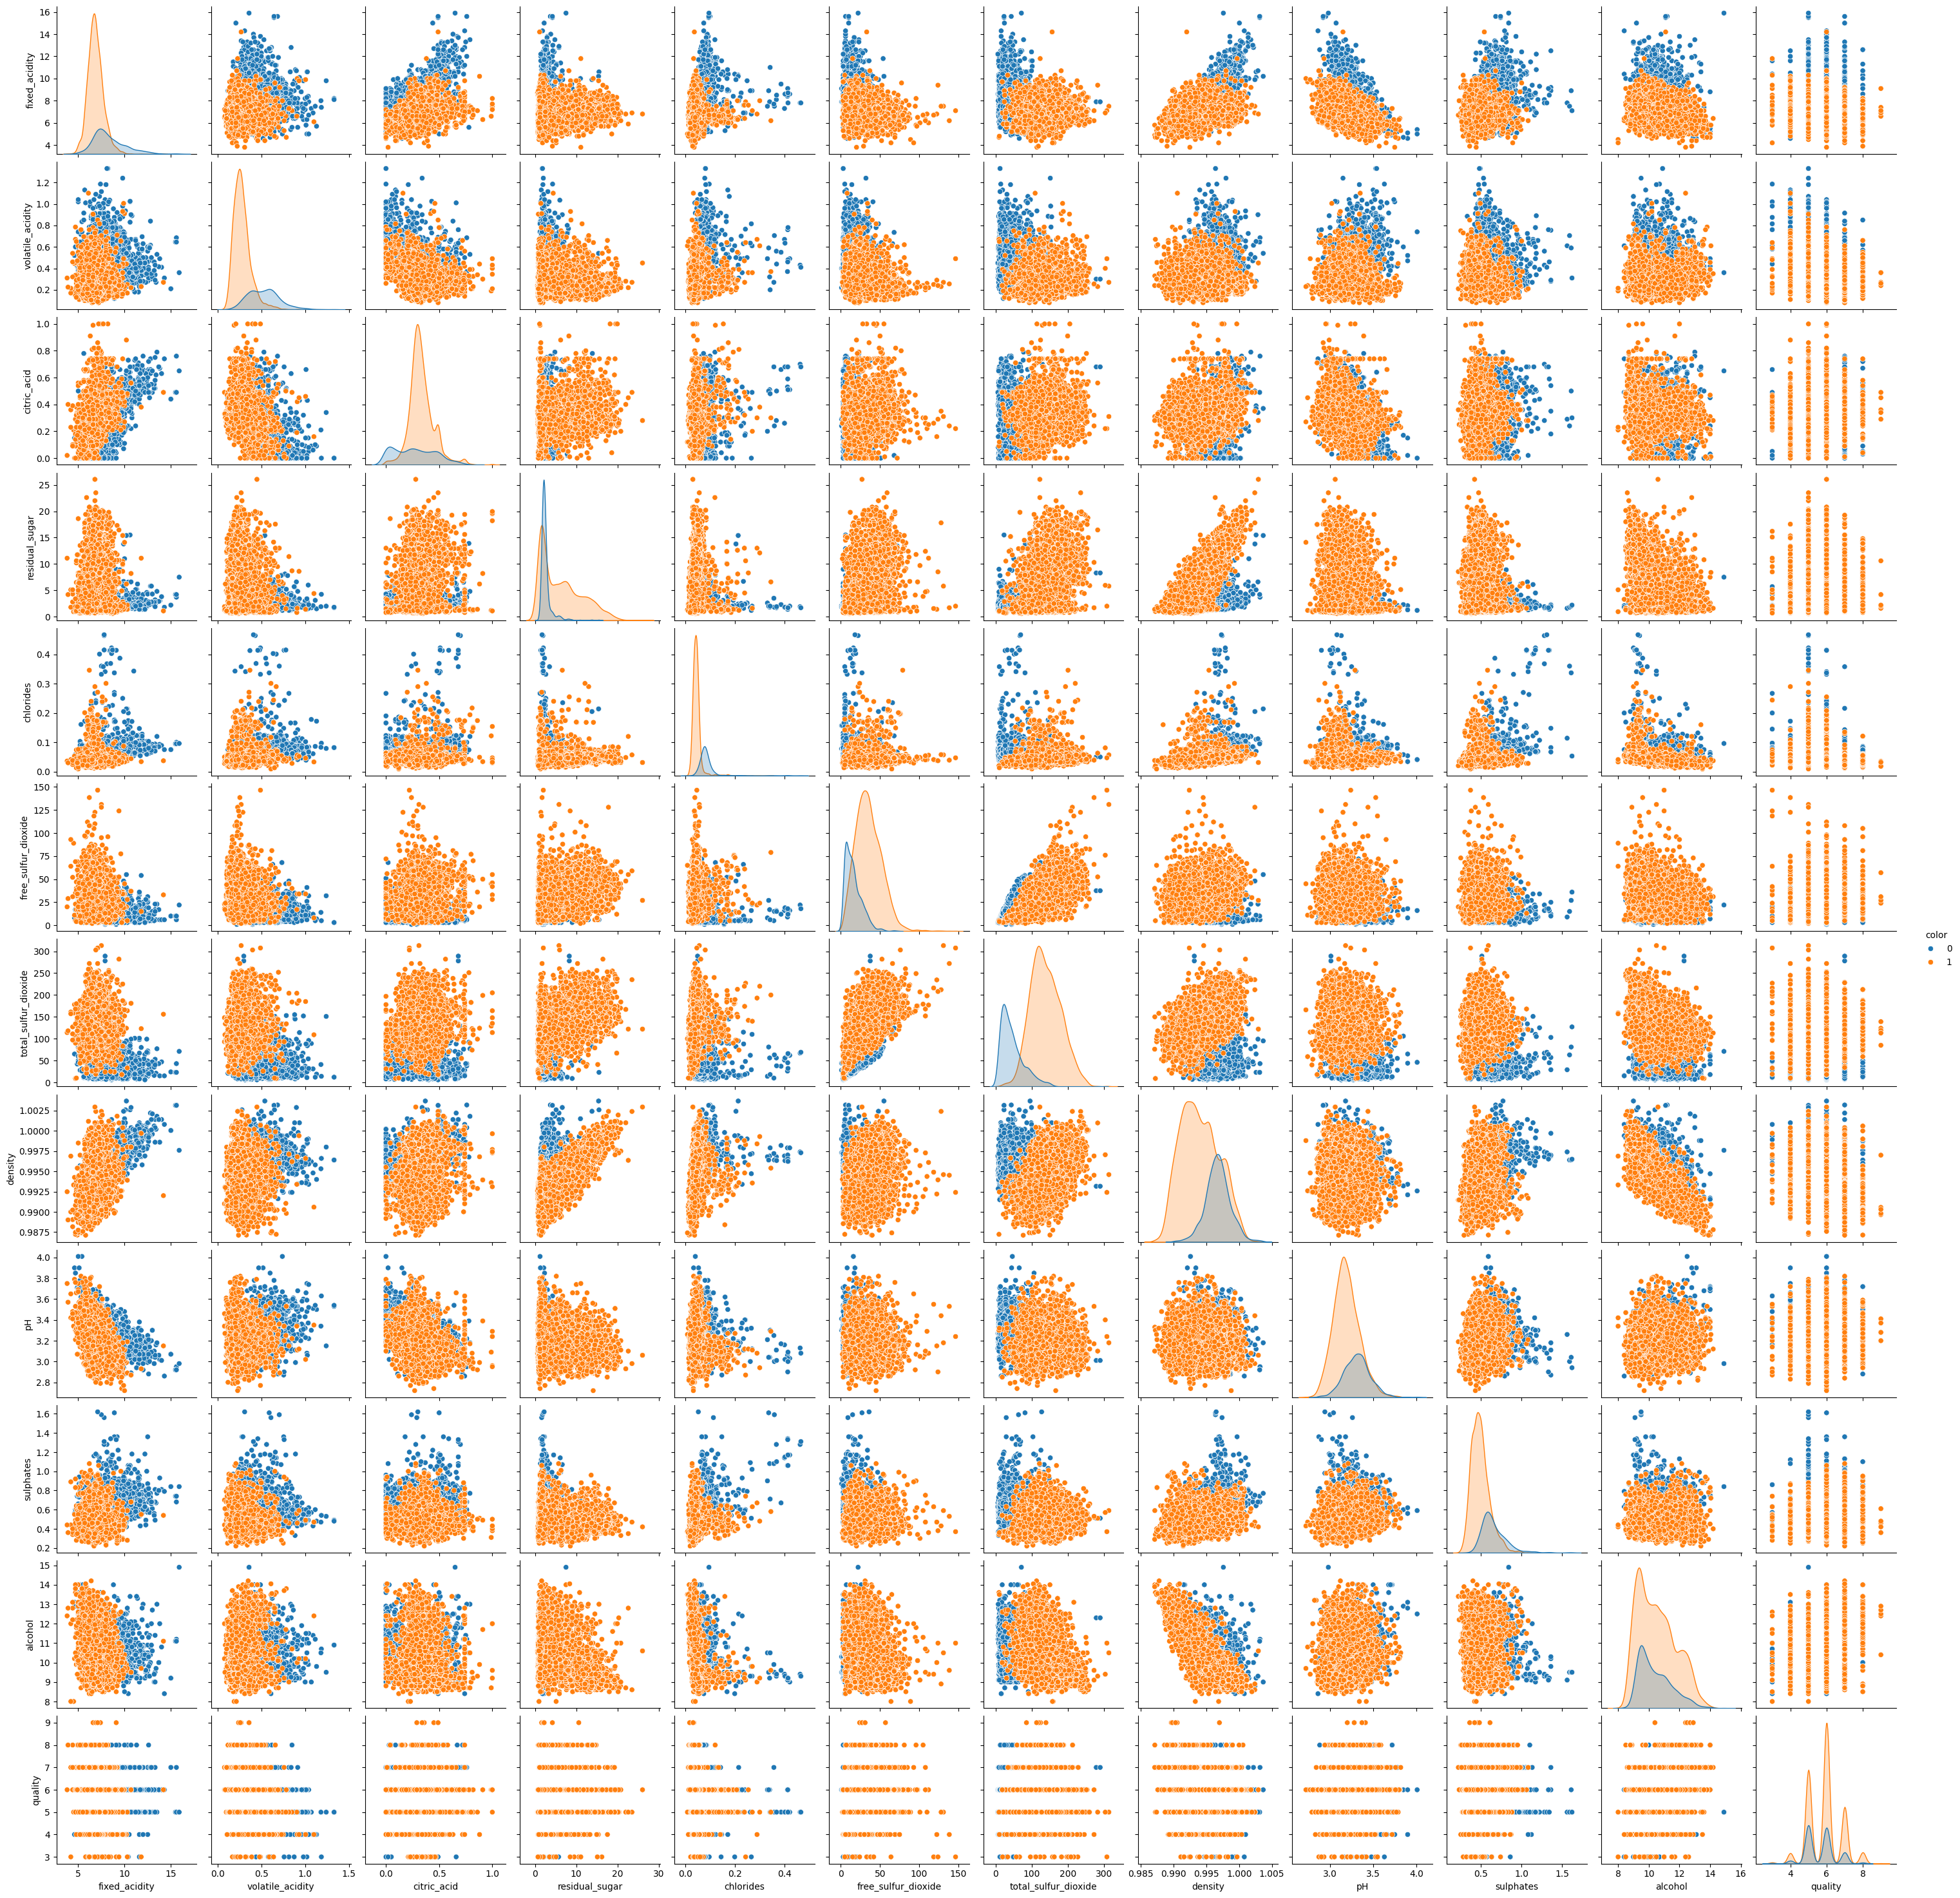

In [237]:
# Multivariate Analysis
# 3.10 Pairwise scatterplot (blue for red wine, orange for white wine)
sns.pairplot(data, hue="color")

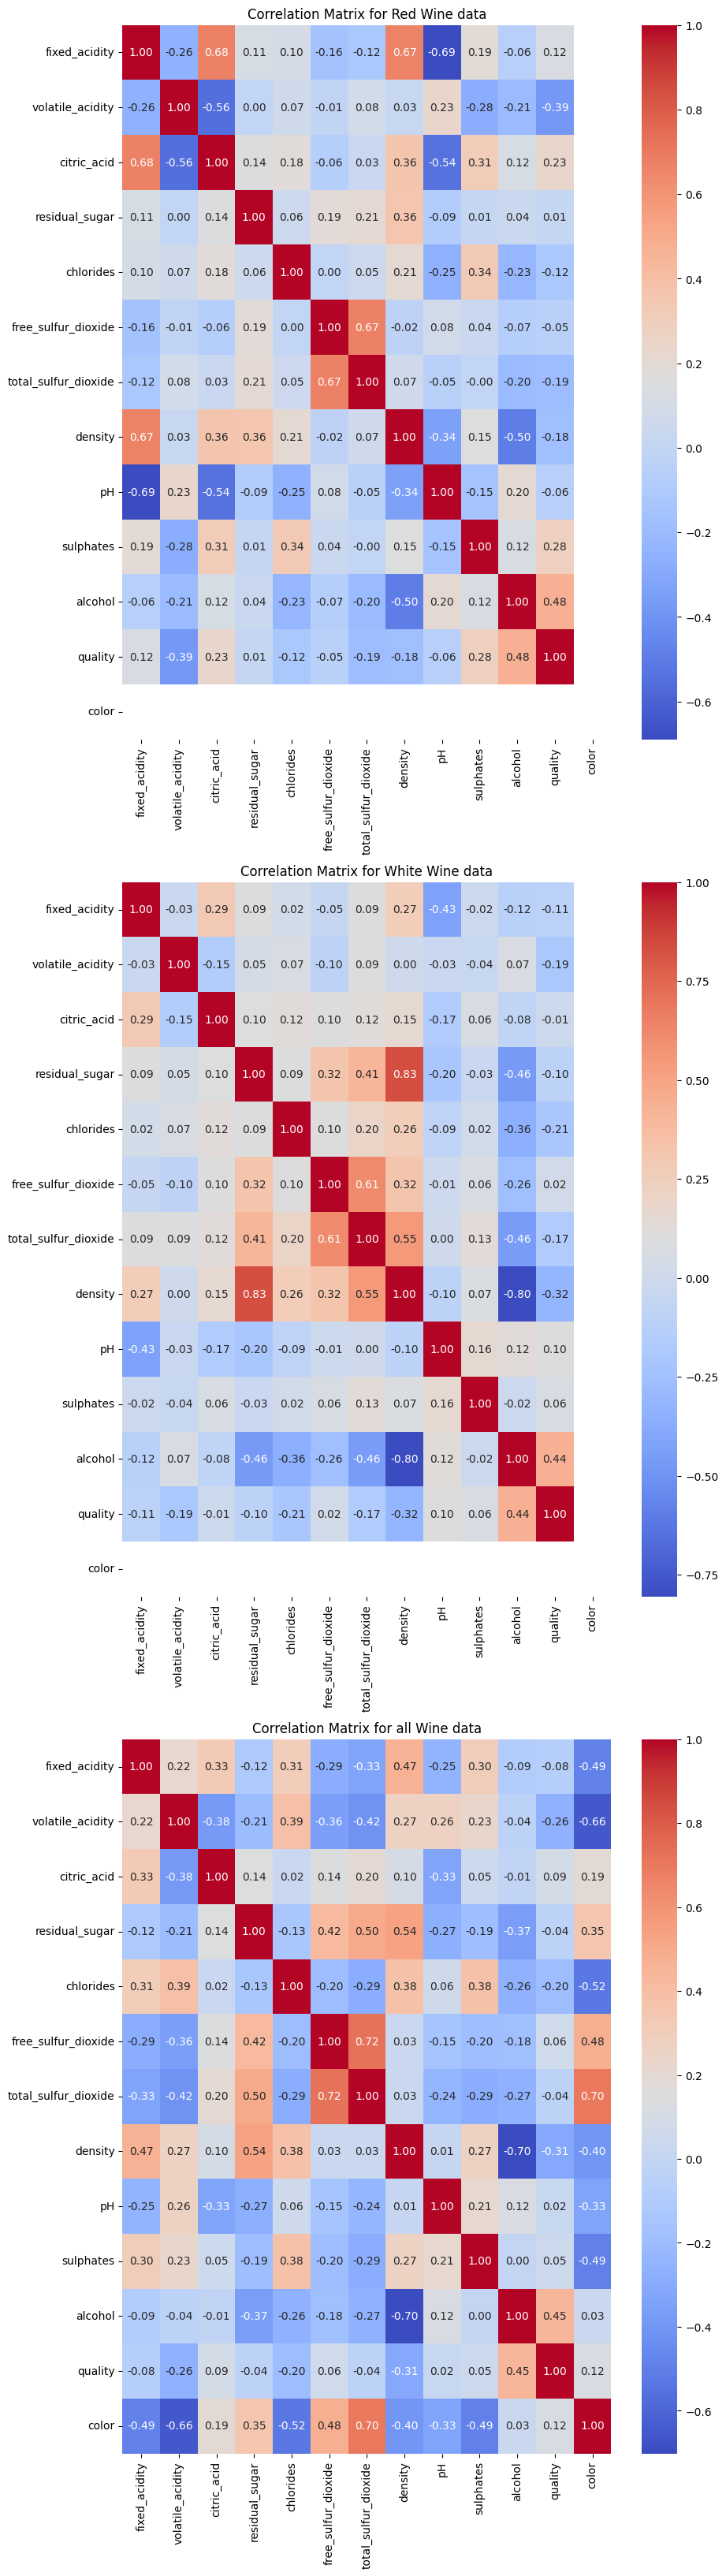

In [228]:
# 3.11 Correlation Matrix
fig, axes = plt.subplots(3, 1, figsize=(10, 40))

red_wine_data_correlation = red_wine_data.corr()
white_wine_data_correlation = white_wine_data.corr()
data_correlation = data.corr()

sns.heatmap(ax=axes[0], data=red_wine_data_correlation, annot=True, cmap='coolwarm', fmt=".2f")
axes[0].set_title('Correlation Matrix for Red Wine data')

sns.heatmap(ax=axes[1], data=white_wine_data_correlation, annot=True, cmap='coolwarm', fmt=".2f")
axes[1].set_title('Correlation Matrix for White Wine data')

sns.heatmap(ax=axes[2], data=data_correlation, annot=True, cmap='coolwarm', fmt=".2f")
axes[2].set_title('Correlation Matrix for all Wine data')
plt.show()

From Multivariate Analysis, we observed that 
- For red wine data, features do not have high correlation
- For white wine data, density has correlation 0.83 and -0.80 with residual sugar and alcohol
- For all wine data, total sulfur dioxide has correlation 0.72 and 0.70 with free sulfur dioxide and color.

We may consdier to drop total sulfur dioxide in all wine data.

# 4 Data Standardization
Although the data is imbalanced, we would not perform data normalization or standardization as we planned to use XGBoost Model which is not sensitive to the scales of features and targets.

In [233]:
# 5 save processed data
data.to_csv("../data/processedWineData.csv", index=False)